Dataset located at:
https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

I divide the dataset into training/validation/test. I chose epoch of 5 for all models for faster training times, which can be increased for professional models.

In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import os
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
from sklearn.utils import shuffle

train_dir = './data/Training/'
test_dir = './data/Testing/'

train_paths, train_labels = [], []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir + label):
        train_paths.append(train_dir + label + '/' + image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [3]:
test_paths, test_labels = [], []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir + label):
        test_paths.append(test_dir + label + '/' + image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [4]:
def open_images(paths, img_size = 128):
    from tensorflow.keras.preprocessing.image import load_img
    
    images = []
    for path in paths:
        image = load_img(path, target_size = (img_size, img_size))
        images.append(image)
    return np.array(images)

X_train_pil = open_images(train_paths)
X_test_pil = open_images(test_paths)

2023-03-26 11:43:35.704853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print('X_train size: ', len(X_train_pil), '\tX_test size: ', len(X_test_pil), \
     '\nTrain label size: ', len(train_labels), '\tTest label size: ', len(test_labels))

X_train size:  5712 	X_test size:  1311 
Train label size:  5712 	Test label size:  1311


# Split Validation / Test Sets

In [6]:
X_train = np.array([np.array(i) for i in X_train_pil])
X_val = np.array([np.array(i) for i in X_test_pil[:len(X_test_pil)//2]])
X_test = np.array([np.array(i) for i in X_test_pil[len(X_test_pil)//2:]])

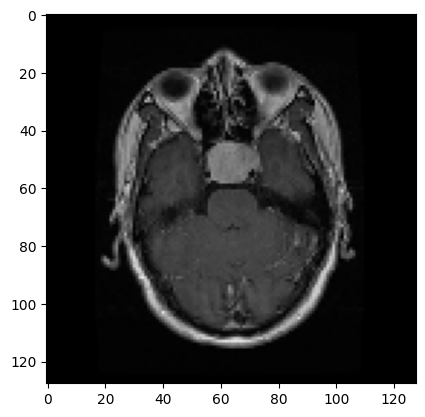

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [8]:
X_train.shape

(5712, 128, 128, 3)

# Model and Training

In [9]:
from keras.utils import to_categorical

# Create a mapping of str to int
types = ['notumor', 'glioma', 'meningioma', 'pituitary']
mapping = {types[i]:i for i in range(len(types))}

y_train = [mapping[train_labels[i]] for i in range(len(train_labels))]
y_val = [mapping[i] for i in test_labels[:len(test_labels)//2]]
y_test = [mapping[i] for i in test_labels[len(test_labels)//2:]]

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

2023-03-25 23:51:47.070592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 23:51:47.071713: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 95s 528ms/step - loss: 18.4148 - accuracy: 0.7241 - val_loss: 0.5297 - val_accuracy: 0.8183
Epoch 2/5
179/179 [==============================] - 96s 539ms/step - loss: 0.2763 - accuracy: 0.9112 - val_loss: 0.3377 - val_accuracy: 0.9038
Epoch 3/5
179/179 [==============================] - 105s 586ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.2952 - val_accuracy: 0.9221
Epoch 4/5
179/179 [==============================] - 85s 474ms/step - loss: 0.0279 - accuracy: 0.9921 - val_loss: 0.3240 - val_accuracy: 0.9115
Epoch 5/5
179/179 [==============================] - 83s 462ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.4655 - val_accuracy: 0.9099


In [27]:
score = model.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5601144433021545
Test accuracy: 0.8810975551605225


### Model Visualization

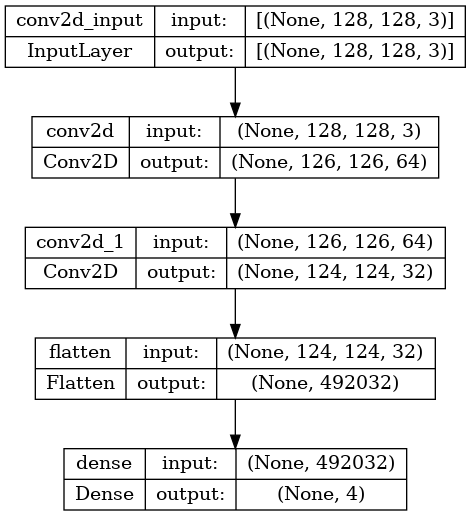

In [29]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

# Model with dropout

In [30]:
from keras.layers import Dropout

#create model
model2 = Sequential()

#add model layers
model2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model2.add(Dropout(.25))
model2.add(Conv2D(32, kernel_size=3, activation='relu'))
model2.add(Dropout(.25))
model2.add(Flatten())
model2.add(Dense(4, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 137s 763ms/step - loss: 51.8448 - accuracy: 0.6658 - val_loss: 0.7202 - val_accuracy: 0.7435
Epoch 2/5
179/179 [==============================] - 134s 747ms/step - loss: 0.4373 - accuracy: 0.8547 - val_loss: 0.5658 - val_accuracy: 0.7878
Epoch 3/5
179/179 [==============================] - 143s 799ms/step - loss: 0.3087 - accuracy: 0.9000 - val_loss: 0.4325 - val_accuracy: 0.8550
Epoch 4/5
179/179 [==============================] - 144s 803ms/step - loss: 0.2249 - accuracy: 0.9312 - val_loss: 0.4997 - val_accuracy: 0.8656
Epoch 5/5
179/179 [==============================] - 139s 779ms/step - loss: 0.1694 - accuracy: 0.9498 - val_loss: 0.3992 - val_accuracy: 0.8824


In [31]:
score2 = model2.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.3889387547969818
Test accuracy: 0.8856707215309143


# Lower Dropout Rate

Since 0.25 gave poorer results than the simpler model above it.

In [32]:
#create model
model3 = Sequential()

#add model layers
model3.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model3.add(Dropout(.2))
model3.add(Conv2D(32, kernel_size=3, activation='relu'))
model3.add(Dropout(.2))
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 128s 715ms/step - loss: 24.1005 - accuracy: 0.6759 - val_loss: 0.6453 - val_accuracy: 0.7557
Epoch 2/5
179/179 [==============================] - 136s 763ms/step - loss: 0.4352 - accuracy: 0.8585 - val_loss: 0.5168 - val_accuracy: 0.7985
Epoch 3/5
179/179 [==============================] - 141s 788ms/step - loss: 0.3125 - accuracy: 0.8950 - val_loss: 0.4254 - val_accuracy: 0.8519
Epoch 4/5
179/179 [==============================] - 138s 773ms/step - loss: 0.2077 - accuracy: 0.9335 - val_loss: 0.4666 - val_accuracy: 0.8534
Epoch 5/5
179/179 [==============================] - 140s 781ms/step - loss: 0.2257 - accuracy: 0.9364 - val_loss: 0.4471 - val_accuracy: 0.8794


In [33]:
score3 = model3.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.5243114829063416
Test accuracy: 0.8795731663703918


Dropout seemed to drop accuracy on validation and train set, compared to simpler model above. So I will drop it out.

# Pooling

Here I try 2 pooling layers. As seen in the plot of the model below, pooling with pool_size of 2 'halves' the dimensions of the image at that layer. Of course this also speeds up the training speed.

In [34]:
from keras.layers import MaxPooling2D

#create model
model4 = Sequential()

#add model layers
model4.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model4.add(MaxPooling2D(pool_size = 2))
model4.add(Conv2D(32, kernel_size=3, activation='relu'))
model4.add(MaxPooling2D(pool_size = 2))
model4.add(Flatten())
model4.add(Dense(4, activation='softmax'))

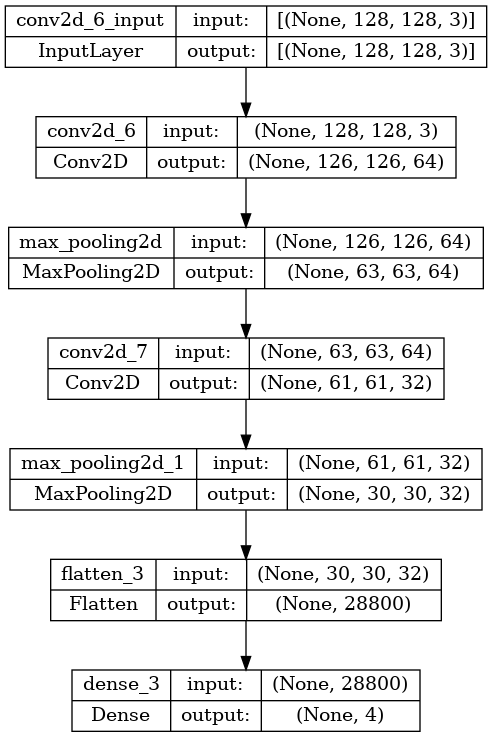

In [35]:
plot_model(model4, show_shapes=True)

In [36]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 50s 275ms/step - loss: 3.7433 - accuracy: 0.7223 - val_loss: 0.4208 - val_accuracy: 0.8595
Epoch 2/5
179/179 [==============================] - 49s 276ms/step - loss: 0.3165 - accuracy: 0.8927 - val_loss: 0.3614 - val_accuracy: 0.8626
Epoch 3/5
179/179 [==============================] - 51s 284ms/step - loss: 0.2278 - accuracy: 0.9216 - val_loss: 0.2707 - val_accuracy: 0.9069
Epoch 4/5
179/179 [==============================] - 47s 265ms/step - loss: 0.1302 - accuracy: 0.9513 - val_loss: 0.2239 - val_accuracy: 0.9313
Epoch 5/5
179/179 [==============================] - 49s 274ms/step - loss: 0.0751 - accuracy: 0.9758 - val_loss: 0.2653 - val_accuracy: 0.9084


In [37]:
score4 = model4.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.3397533595561981
Test accuracy: 0.9070122241973877


Test score increased to .90 with pooling.

# Less pooling model

In [40]:
#create model
model5 = Sequential()

#add model layers
model5.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Conv2D(32, kernel_size=3, activation='relu'))
model5.add(Flatten())
model5.add(Dense(4, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 51s 282ms/step - loss: 9.7755 - accuracy: 0.7309 - val_loss: 0.5085 - val_accuracy: 0.8351
Epoch 2/5
179/179 [==============================] - 53s 294ms/step - loss: 0.3489 - accuracy: 0.8803 - val_loss: 0.3846 - val_accuracy: 0.8763
Epoch 3/5
179/179 [==============================] - 55s 310ms/step - loss: 0.2202 - accuracy: 0.9216 - val_loss: 0.3576 - val_accuracy: 0.8901
Epoch 4/5
179/179 [==============================] - 52s 291ms/step - loss: 0.1494 - accuracy: 0.9480 - val_loss: 0.4247 - val_accuracy: 0.8824
Epoch 5/5
179/179 [==============================] - 46s 256ms/step - loss: 0.0930 - accuracy: 0.9694 - val_loss: 0.4560 - val_accuracy: 0.8809


In [41]:
score5 = model5.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.46406760811805725
Test accuracy: 0.8780487775802612


Seems more pooling was better.

# Fully Connected Layer

Here I add a fully connected layer before softmax. Does not have much impact on training time.

In [38]:
#create model
model6 = Sequential()

#add model layers
model6.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model6.add(MaxPooling2D(pool_size = 2))
model6.add(Conv2D(32, kernel_size=3, activation='relu'))
model6.add(MaxPooling2D(pool_size = 2))
model6.add(Flatten())
model6.add(Dense(64, activation='relu'))
model6.add(Dense(4, activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model6.fit(X_train, y_train_ohe, validation_data=(X_val, y_val_ohe), epochs = 5)

Epoch 1/5
179/179 [==============================] - 51s 282ms/step - loss: 4.8058 - accuracy: 0.7658 - val_loss: 0.4065 - val_accuracy: 0.8656
Epoch 2/5
179/179 [==============================] - 51s 283ms/step - loss: 0.2478 - accuracy: 0.9214 - val_loss: 0.3400 - val_accuracy: 0.8779
Epoch 3/5
179/179 [==============================] - 48s 269ms/step - loss: 0.1232 - accuracy: 0.9615 - val_loss: 0.2674 - val_accuracy: 0.9130
Epoch 4/5
179/179 [==============================] - 47s 265ms/step - loss: 0.0809 - accuracy: 0.9723 - val_loss: 0.3207 - val_accuracy: 0.8992
Epoch 5/5
179/179 [==============================] - 55s 308ms/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.2408 - val_accuracy: 0.9252


In [39]:
score6 = model6.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 0.2692599594593048
Test accuracy: 0.9283536672592163


Fully connected layer increased test set accuracy to .92. Validation accuracy is .92 too, all better than the simpler model while training accuracy being slightly less than that model, indicating less overfitting.

# VGG16

In [17]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights = "imagenet", include_top = False, input_shape = X_train.shape[1:])
base_model.trainable = False ## Not trainable weights for faster training, otherwise it takes hours on local comp
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [18]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

model7 = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model7.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 3,  restore_best_weights = True)

model7.fit(X_train, y_train_ohe, epochs = 5, validation_data=(X_val, y_val_ohe), callbacks = [es])

Epoch 1/5
179/179 [==============================] - 172s 958ms/step - loss: 0.7329 - accuracy: 0.8291 - val_loss: 0.3543 - val_accuracy: 0.8885
Epoch 2/5
179/179 [==============================] - 169s 945ms/step - loss: 0.2128 - accuracy: 0.9272 - val_loss: 0.2419 - val_accuracy: 0.9191
Epoch 3/5
179/179 [==============================] - 165s 925ms/step - loss: 0.1182 - accuracy: 0.9576 - val_loss: 0.1846 - val_accuracy: 0.9450
Epoch 4/5
179/179 [==============================] - 149s 833ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.2097 - val_accuracy: 0.9374
Epoch 5/5
179/179 [==============================] - 151s 844ms/step - loss: 0.0469 - accuracy: 0.9842 - val_loss: 0.1666 - val_accuracy: 0.9634


In [19]:
score7 = model7.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 0.17548254132270813
Test accuracy: 0.9405487775802612


With a 96 percent validation accuracy and a 94 percent test accuracy, VGG16 outperformed all previous models.

# VGG19

In [21]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

## Loading VGG16 model
base_model = VGG19(weights = "imagenet", include_top = False, input_shape = X_train.shape[1:])
base_model.trainable = False ## Not trainable weights for faster training, otherwise it takes hours on local comp
base_model.summary()

80134624/80134624 [==============================] - 27s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                             

In [22]:
model8 = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model8.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 3,  restore_best_weights = True)

model8.fit(X_train, y_train_ohe, epochs = 5, validation_data=(X_val, y_val_ohe), callbacks = [es])

Epoch 1/5
179/179 [==============================] - 184s 1s/step - loss: 0.7955 - accuracy: 0.8158 - val_loss: 0.4062 - val_accuracy: 0.8733
Epoch 2/5
179/179 [==============================] - 183s 1s/step - loss: 0.2058 - accuracy: 0.9293 - val_loss: 0.3352 - val_accuracy: 0.8992
Epoch 3/5
179/179 [==============================] - 182s 1s/step - loss: 0.1271 - accuracy: 0.9550 - val_loss: 0.2332 - val_accuracy: 0.9252
Epoch 4/5
179/179 [==============================] - 183s 1s/step - loss: 0.0923 - accuracy: 0.9666 - val_loss: 0.2183 - val_accuracy: 0.9252
Epoch 5/5
179/179 [==============================] - 184s 1s/step - loss: 0.0634 - accuracy: 0.9785 - val_loss: 0.1652 - val_accuracy: 0.9511


In [23]:
score8 = model8.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 0.1787535548210144
Test accuracy: 0.9466463327407837


VGG19 performed similar to VGG16.